In [1]:
import findspark
findspark.init()

In [2]:
import numpy as np

from text_clustering import text_clustering, tags, train_model
from get_data import get_all_memes, get_tags_data
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import functions

In [3]:
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

In [4]:
l = [('Alice', 1)]
spark.createDataFrame(l) #check if spark is initalized properly

DataFrame[_1: string, _2: bigint]

In [5]:
memes_df = get_all_memes(spark)

In [6]:
memes_df.count()

9690

Tagi

In [7]:
memes_tags = get_tags_data(memes_df)

normalization


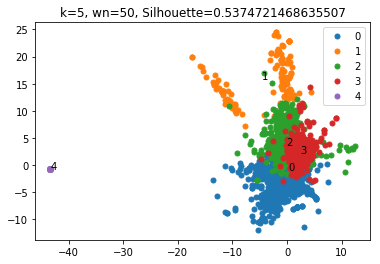

PCA, explained variance= [0.3730141118708799,0.18134916279160496]
normalization


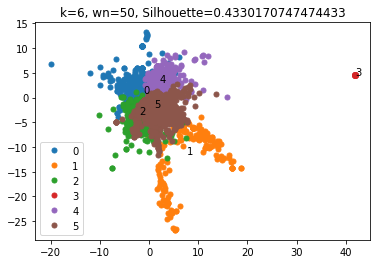

PCA, explained variance= [0.3889642221513574,0.16246815915133803]
normalization


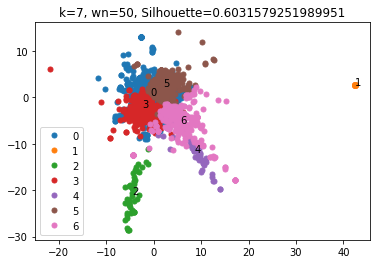

PCA, explained variance= [0.39294561564340835,0.16367559193854178]
normalization


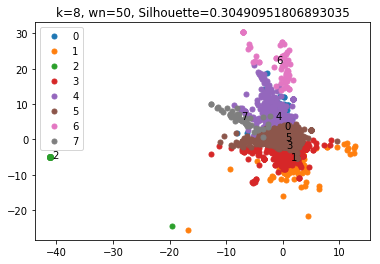

PCA, explained variance= [0.32438791552054974,0.23685143049306215]
normalization


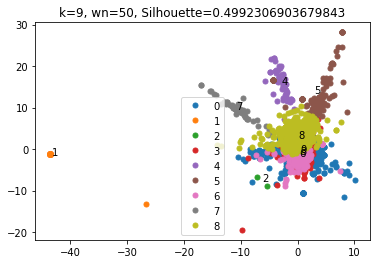

PCA, explained variance= [0.3642732113136529,0.16435054143241504]
normalization


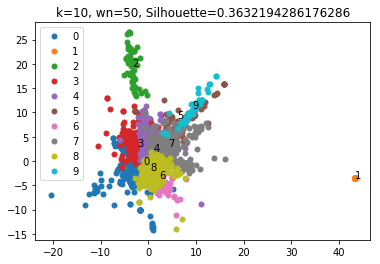

PCA, explained variance= [0.40306308078689346,0.1667483338566928]


In [9]:
for k in np.arange(5,11):
    trial = text_clustering(memes_df, k, True, 50)
#     memes_tags = trial.join(memes_tags, on=['id'], how='left_outer')
#     split_col = functions.split(memes_tags.tags, ',')
#     dataFrame = memes_tags.withColumn("tags_separated", split_col)
#     trial2 = dataFrame.filter('tags_separated is not null').select('tags_separated', 'prediction')
    # slownik = tags(trial2, k)
    # for key in slownik.keys():
    #     print('cluster={0}'.format(key))
    #     print(slownik[key][:3])

In [ ]:
trial = text_clustering(memes_df, 7, True, 50)

In [7]:
memes_tags = trial.join(memes_tags, on=['id'], how='left_outer')
split_col = functions.split(memes_tags.tags, ',')
dataFrame = memes_tags.withColumn("tags_separated", split_col)
trial2 = dataFrame.filter('tags_separated is not null').select('tags_separated', 'prediction')
slownik = tags(trial2, 7)
for key in slownik.keys():
    print('cluster={0}'.format(key))
    print(slownik[key][0])

cluster=0
[('funny', 23), ('dankmemes', 17), ('coronavirus', 11)]
cluster=1
[('rpg', 1), ('dnd', 1), ('barbarian', 1)]
cluster=2
[]
cluster=3
[]
cluster=4
[('minimumrequirements', 4), ('videogames', 4), ('panik', 1)]
cluster=5
[('cyberpunk2077', 2), ('zwoom', 1), ('genitals', 1)]
cluster=6
[('funny', 2), ('minecraft', 2), ('dankmemes', 2)]


In [ ]:
train_model(memes_df, memes_tags)

In [ ]:
from text_clustering import text_clustering, tags, train_model
from get_data import get_all_memes, get_tags_data
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import Word2Vec
from pyspark.ml.clustering import KMeans

sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

memes_df = get_all_memes(spark)
memes_tags = get_tags_data(memes_df)

k = 7
data_with_prediciton, clust_names = train_model(memes_df, memes_tags, k = k)

tmp = spark.createDataFrame([(str(i), clust_names[str(i)]) for i in range(int(k))], ["Cluster_id", "Cluster_name"])
tmp \
   .repartition(1) \
   .write.format("com.databricks.spark.csv") \
   .option("header", "true") \
   .save("/models/clusters_names", mode='overwrite')

# for future predictions
# model_w2v = Word2Vec.load("models/model_w2v")
# model_kmeans = KMeans.load("models/model_kmeans")